# Annually Averaged Scalar Timeseries

This notebook shows how we extract information from ocean_scalar to plot timeseries. The data are resampled onto annual averages.

**Firstly,** load in the required libraries:

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt

netcdf_index loaded.


**Next,** we show to plot a single variable from a single experiment. The variable is loaded using ```get_nc_variable```. Note that we reference dates to 1900, so that we can use pandas to ```resample``` the data onto annual frequency. 

In [5]:
expt =  '025deg_jra55v13_ryf8485_KDS75'
variable = 'ke_tot'
darray = cc.get_nc_variable(expt,
                             'ocean_scalar.nc',
                             variable,
                             time_units='days since 1900-01-01')
annual_average = darray.resample(time='A').mean()

HBox(children=(IntProgress(value=0, description='get_nc_variable:: ', max=115), HTML(value='')))

**Then,** the data can be plotted as you see fit:

Text(0.5,1,'025deg_jra55v13_ryf8485_KDS75')

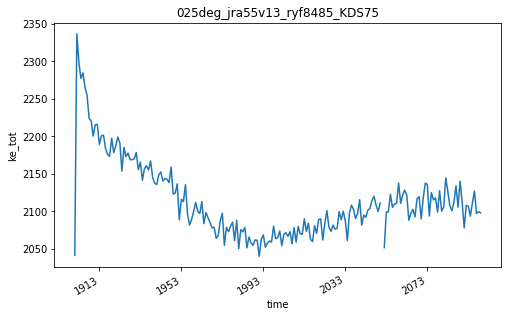

In [6]:
plt.figure(figsize=(8,5))
annual_average.plot()
plt.title(expt)

**With the latest version of ACCESS-OM2 we store dates in the output fields, starting with an arbitrary date.** 

In this case the logic of the call to `get_nc_variable` differs slightly:

In [8]:
expt =  '025deg_jra55v13_ryf8485_KDS50'
variable = 'ke_tot'
darray = cc.get_nc_variable(expt,
                             'ocean_scalar.nc',
                             variable,
                             time_units=None)
annual_average = darray.resample(time='A').mean()

HBox(children=(IntProgress(value=0, description='get_nc_variable:: ', max=24), HTML(value='')))

Text(0.5,1,'025deg_jra55v13_ryf8485_KDS50')

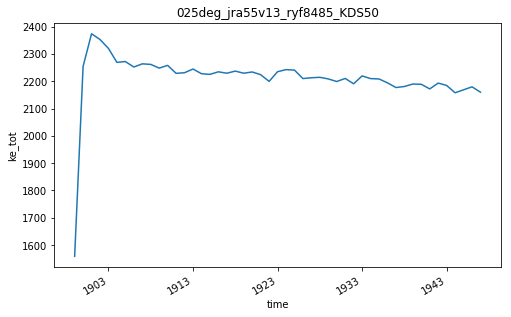

In [9]:
plt.figure(figsize=(8,5))
annual_average.plot()
plt.title(expt)

**Finally,** if you are intending to incorporate this type of code into your notebook, you may like to use the pre-written ```annual_scalar``` function (see functions under ```cosima_cookbook/```). This function can handle multiple experiments and multiple variables as shown below.

**The problem we have is that we now have model versions with two different date configurations, so that existing scripts such as `annual_scalar` fail on the new data, as shown below:**

In [10]:
esub = [ '025deg_jra55v13_ryf8485_KDS75',
 '025deg_jra55v13_ryf8485_KDS50'
       ]
variables = ['ke_tot', 
             'eta_global']
cc.plots.annual_scalar(esub, variables)

HBox(children=(IntProgress(value=0, description='experiments: ', max=2), HTML(value='')))

/home/157/amh157/cosima-cookbook/cosima_cookbook/netcdf_index.py:382: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  decoded_time = xr.conventions.decode_cf_datetime(dataarray.time, time_units)


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

**The question here is how we should deal with the new data, while still being backward compatible with the old data.**

Options are:
 * Build some logic into `get_nc_variable` so that it is hidden from the user;
 * Write our individual scripts with workarounds for old and new data.
Obviousy, the former is cleaner, but I am not familiar enough with the database to know how to do it. In addition, we may need to consider adjusting dates after reading in, so that longer runs start from 1700.